In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


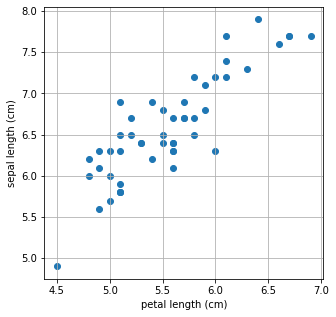

In [3]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


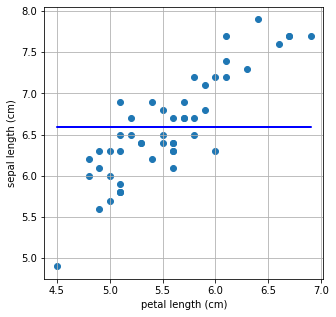

In [4]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [6]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [9]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
# [[YOUR CODE]]
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

Result of Lasso
result of linear regression
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


In [10]:
#L1 노름은 가중치가 0이 될 수 있음

In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [12]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [13]:
# Q. L1 regularization 코드를 참고하여 아래 코드를 채워주세요.

from sklearn.linear_model import Ridge

# [[YOUR CODE]]
L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)
print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4420 - accuracy: 0.4303
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2106 - accuracy: 0.5062
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1553 - accuracy: 0.5254
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1284 - accuracy: 0.5406
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1032 - accuracy: 0.5479


In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4979 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3351 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3106 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8913


In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 3s 23ms/step - loss: 2.0539 - accuracy: 0.4895 - val_loss: 1.6503 - val_accuracy: 0.5667
Epoch 2/200
117/117 [==============================] - 2s 20ms/step - loss: 1.4017 - accuracy: 0.6134 - val_loss: 1.1737 - val_accuracy: 0.6600
Epoch 3/200
117/117 [==============================] - 2s 20ms/step - loss: 1.0711 - accuracy: 0.6789 - val_loss: 0.9507 - val_accuracy: 0.7167
Epoch 4/200
117/117 [==============================] - 2s 21ms/step - loss: 0.8918 - accuracy: 0.7199 - val_loss: 0.8121 - val_accuracy: 0.7500
Epoch 5/200
117/117 [==============================] - 2s 20ms/step - loss: 0.7857 - accuracy: 0.7357 - val_loss: 0.7323 - val_accuracy: 0.7700
Epoch 6/200
117/117 [==============================] - 2s 19ms/step - loss: 0.7210 - accuracy: 0.7493 - val_loss: 0.6856 - val_accuracy: 0.7850
Epoch 7/200
117/117 [==============================] - 2s 20ms/step - loss: 0.6791 - accuracy: 0.7594 - val_loss: 0.6468 - val_accuracy:

117/117 [==============================] - 2s 20ms/step - loss: 0.3428 - accuracy: 0.8791 - val_loss: 0.3606 - val_accuracy: 0.8567
Epoch 114/200
117/117 [==============================] - 2s 20ms/step - loss: 0.3425 - accuracy: 0.8791 - val_loss: 0.3617 - val_accuracy: 0.8650
Epoch 115/200
117/117 [==============================] - 2s 21ms/step - loss: 0.3416 - accuracy: 0.8789 - val_loss: 0.3594 - val_accuracy: 0.8517
Epoch 116/200
117/117 [==============================] - 2s 20ms/step - loss: 0.3398 - accuracy: 0.8795 - val_loss: 0.3609 - val_accuracy: 0.8550
Epoch 117/200
117/117 [==============================] - 2s 20ms/step - loss: 0.3401 - accuracy: 0.8796 - val_loss: 0.3592 - val_accuracy: 0.8600
Epoch 118/200
117/117 [==============================] - 2s 20ms/step - loss: 0.3384 - accuracy: 0.8801 - val_loss: 0.3592 - val_accuracy: 0.8600
Epoch 119/200
117/117 [==============================] - 2s 20ms/step - loss: 0.3376 - accuracy: 0.8809 - val_loss: 0.3594 - val_accuracy:

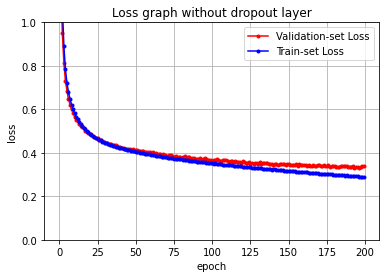

In [56]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

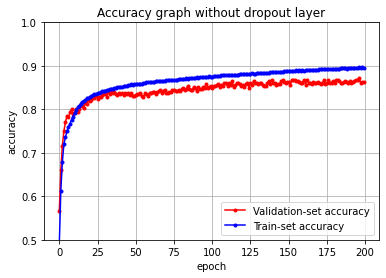

In [57]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [60]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    # [[YOUR CODE]]
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 2s 13ms/step - loss: 2.0661 - accuracy: 0.4956 - val_loss: 1.6732 - val_accuracy: 0.6117
Epoch 2/200
117/117 [==============================] - 1s 12ms/step - loss: 1.4563 - accuracy: 0.5597 - val_loss: 1.2193 - val_accuracy: 0.6833
Epoch 3/200
117/117 [==============================] - 1s 12ms/step - loss: 1.1507 - accuracy: 0.6283 - val_loss: 1.0032 - val_accuracy: 0.7167
Epoch 4/200
117/117 [==============================] - 1s 12ms/step - loss: 0.9852 - accuracy: 0.6714 - val_loss: 0.8724 - val_accuracy: 0.7367
Epoch 5/200
117/117 [==============================] - 1s 12ms/step - loss: 0.8811 - accuracy: 0.6996 - val_loss: 0.7829 - val_accuracy: 0.7533
Epoch 6/200
117/117 [==============================] - 2s 18ms/step - loss: 0.8115 - accuracy: 0.7154 - val_loss: 0.7281 - val_accuracy: 0.7717
Epoch 7/200
117/117 [==============================] - 2s 21ms/step - loss: 0.7676 - accuracy: 0.7285 - val_loss: 0.6903 - val_accuracy:

117/117 [==============================] - 3s 22ms/step - loss: 0.3612 - accuracy: 0.8715 - val_loss: 0.3481 - val_accuracy: 0.8533
Epoch 114/200
117/117 [==============================] - 3s 22ms/step - loss: 0.3603 - accuracy: 0.8717 - val_loss: 0.3476 - val_accuracy: 0.8517
Epoch 115/200
117/117 [==============================] - 3s 22ms/step - loss: 0.3586 - accuracy: 0.8719 - val_loss: 0.3454 - val_accuracy: 0.8567
Epoch 116/200
117/117 [==============================] - 3s 22ms/step - loss: 0.3583 - accuracy: 0.8737 - val_loss: 0.3451 - val_accuracy: 0.8633
Epoch 117/200
117/117 [==============================] - 3s 22ms/step - loss: 0.3577 - accuracy: 0.8726 - val_loss: 0.3469 - val_accuracy: 0.8600
Epoch 118/200
117/117 [==============================] - 3s 23ms/step - loss: 0.3586 - accuracy: 0.8742 - val_loss: 0.3450 - val_accuracy: 0.8633
Epoch 119/200
117/117 [==============================] - 3s 22ms/step - loss: 0.3556 - accuracy: 0.8742 - val_loss: 0.3450 - val_accuracy:

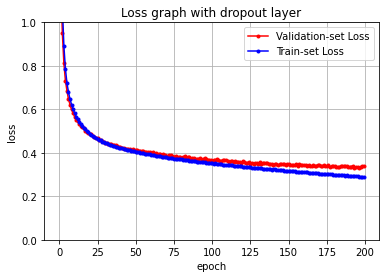

In [61]:
# Q. loss 값의 그래프를 그려봅시다.
# [[YOUR CODE]]

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

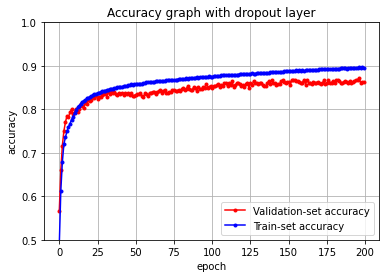

In [62]:
# Q. accuracy 값의 그래프를 그려봅시다. 
# [[YOUR CODE]]

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [18]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 39ms/step - loss: 1.1900 - accuracy: 0.6198 - val_loss: 0.7349 - val_accuracy: 0.7472
Epoch 2/20
21/21 [==============================] - 1s 28ms/step - loss: 0.6441 - accuracy: 0.7771 - val_loss: 0.5887 - val_accuracy: 0.8002
Epoch 3/20
21/21 [==============================] - 1s 25ms/step - loss: 0.5471 - accuracy: 0.8155 - val_loss: 0.5318 - val_accuracy: 0.8194
Epoch 4/20
21/21 [==============================] - 1s 27ms/step - loss: 0.5022 - accuracy: 0.8307 - val_loss: 0.4981 - val_accuracy: 0.8318
Epoch 5/20
21/21 [==============================] - 1s 27ms/step - loss: 0.4750 - accuracy: 0.8394 - val_loss: 0.4782 - val_accuracy: 0.8361
Epoch 6/20
21/21 [==============================] - 1s 27ms/step - loss: 0.4517 - accuracy: 0.8472 - val_loss: 0.4618 - val_accuracy: 0.8422
Epoch 7/20
21/21 [==============================] - 1s 25ms/step - loss: 0.4361 - accuracy: 0.8512 - val_loss: 0.4444 - val_accuracy: 0.8477
Epoch 8/20
21

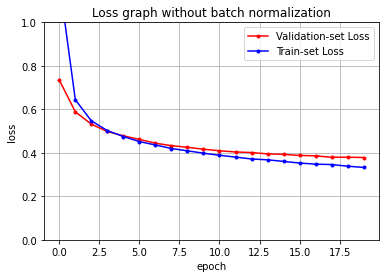

In [20]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

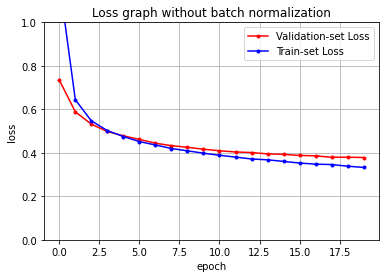

In [21]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    # [[YOUR CODE]]
    # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 2s 37ms/step - loss: 0.9728 - accuracy: 0.6722 - val_loss: 1.0386 - val_accuracy: 0.6866
Epoch 2/20
21/21 [==============================] - 1s 27ms/step - loss: 0.5270 - accuracy: 0.8210 - val_loss: 0.8167 - val_accuracy: 0.7578
Epoch 3/20
21/21 [==============================] - 1s 30ms/step - loss: 0.4571 - accuracy: 0.8429 - val_loss: 0.7273 - val_accuracy: 0.7985
Epoch 4/20
21/21 [==============================] - 1s 29ms/step - loss: 0.4180 - accuracy: 0.8562 - val_loss: 0.6631 - val_accuracy: 0.8206
Epoch 5/20
21/21 [==============================] - 1s 27ms/step - loss: 0.3906 - accuracy: 0.8654 - val_loss: 0.6059 - val_accuracy: 0.8346
Epoch 6/20
21/21 [==============================] - 1s 29ms/step - loss: 0.3676 - accuracy: 0.8735 - val_loss: 0.5595 - val_accuracy: 0.8447
Epoch 7/20
21/21 [==============================] - 1s 29ms/step - loss: 0.3491 - accuracy: 0.8784 - val_loss: 0.5203 - val_accuracy: 0.8498
Epoch 8/20
21

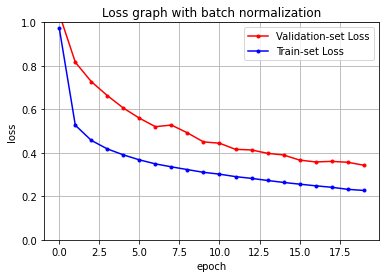

In [26]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

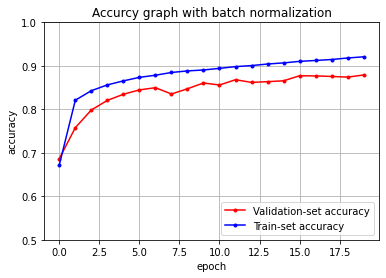

In [27]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()